# The Mathematical Builing blocks of Nueral Networks 

## First look at Neural Networks

In [10]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape, test_images.shape)
print(train_labels, test_labels)


(60000, 28, 28) (10000, 28, 28)
[5 0 4 ... 5 6 8] [7 2 1 ... 4 5 6]


In [11]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 24s 28ms/step - loss: 0.4324 - accuracy: 0.8728
Epoch 2/5
469/469 [==============================] - 19s 40ms/step - loss: 0.1093 - accuracy: 0.9684
Epoch 3/5
469/469 [==============================] - 19s 41ms/step - loss: 0.0672 - accuracy: 0.9809
Epoch 4/5
469/469 [==============================] - 22s 46ms/step - loss: 0.0488 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 21s 44ms/step - loss: 0.0348 - accuracy: 0.9899


In [12]:
test_digits = test_images[0:10]
predictions  =model.predict(test_digits)
print(predictions[0])
print(predictions[0].argmax())
print(predictions[0][7])
print(test_labels[0])


[9.7021968e-10 9.4558632e-11 1.1696785e-06 4.9143923e-06 2.1455210e-13
 1.1185982e-09 3.6857406e-15 9.9999368e-01 1.1410008e-08 2.2007831e-07]
7
0.9999937
7


In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 4s 10ms/step - loss: 0.0681 - accuracy: 0.9800
test_acc: 0.9800000190734863


## Data Representation for Nueral networks

In [17]:
import numpy as np
x = np.array(12)        # Scalars (rank-0 tensors)
print(x, '\t', x.ndim)

x = np.array([12, 3, 6, 14, 7])             # Vectors (rank-1 tensors)
print(x, '\t', x.ndim)

x = np.array([[5, 78, 2, 34, 0],            # Matrices (rank-2 tensors)
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
print(x, '\t', x.ndim)

x = np.array([[[5, 78, 2, 34, 0],           # Rank-3 and higher-rank tensors
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
print(x, '\t', x.ndim)


12 	 0
[12  3  6 14  7] 	 1
[[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]] 	 2
[[[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]] 	 3


## Manipulating tensors in NumPy

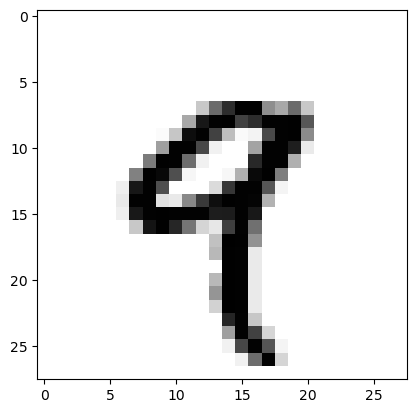

In [21]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [22]:
my_slice = train_images[10:100]
print(my_slice.shape)

my_slice = train_images[10:100, :, :]
print(my_slice.shape)

my_slice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape)

my_slice = train_images[:, 14:, 14:]      # select 14 × 14 pixels in the bottom-right corner of all images,
print(my_slice.shape)

my_slice = train_images[:, 7:-7, 7:-7]    # patches of 14 × 14 pixels centered in the middle,
print(my_slice.shape)


(90, 28, 28)
(90, 28, 28)
(90, 28, 28)
(60000, 14, 14)
(60000, 14, 14)


## Element wise Operations

In [23]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()      # Avoid overwriting the input tensor.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

# Let’s actually time the difference:

import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s
Took: 1.70 s


## Broadcating

In [27]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

y = np.expand_dims(y, axis=0)   # we add an empty first axis to y, whose shape becomes (1, 10):
print(y)

Y = np.concatenate([y] * 32, axis=0)        # Repeat y 32 times along axis 0 to obtain Y, which has shape (32, 10).


[[0.85341014 0.12327717 0.48371947 0.91994419 0.35101888 0.86339724
  0.59564218 0.79328974 0.47323699 0.10820587]]


In [28]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

With broadcasting, you can generally perform element-wise operations that take two
inputs tensors if one tensor has shape `(a, b, … n, n + 1, … m)` and the other has shape `(n,
n + 1, … m)`. The broadcasting will then automatically happen for axes a through `n - 1`.

In [29]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)    # The output z has shape shape (64, 3, 32, 10) like x.


## Tensor Reshaping

In [33]:
train_images = train_images.reshape((60000, 28 * 28))

x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
print(x.shape)

x = x.reshape((6, 1))
print(x, x.shape)

x = x.reshape((2, 3))
print(x)

x = np.zeros((300, 20))
x = np.transpose(x)
print(x.shape)


(3, 2)
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]] (6, 1)
[[0. 1. 2.]
 [3. 4. 5.]]
(20, 300)


## Gradient Tape

In [34]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])    

## Reimplementing our first example from scratch in TensorFlow

In [35]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights



model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4


import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels


def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss


learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)


from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))


def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")


from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 6.52
loss at batch 100: 2.28
loss at batch 200: 2.21
loss at batch 300: 2.14
loss at batch 400: 2.27
Epoch 1
loss at batch 0: 1.92
loss at batch 100: 1.91
loss at batch 200: 1.82
loss at batch 300: 1.75
loss at batch 400: 1.85
Epoch 2
loss at batch 0: 1.59
loss at batch 100: 1.60
loss at batch 200: 1.49
loss at batch 300: 1.45
loss at batch 400: 1.52
Epoch 3
loss at batch 0: 1.33
loss at batch 100: 1.35
loss at batch 200: 1.23
loss at batch 300: 1.23
loss at batch 400: 1.28
Epoch 4
loss at batch 0: 1.13
loss at batch 100: 1.17
loss at batch 200: 1.03
loss at batch 300: 1.07
loss at batch 400: 1.11
Epoch 5
loss at batch 0: 0.98
loss at batch 100: 1.03
loss at batch 200: 0.90
loss at batch 300: 0.94
loss at batch 400: 0.99
Epoch 6
loss at batch 0: 0.87
loss at batch 100: 0.92
loss at batch 200: 0.79
loss at batch 300: 0.85
loss at batch 400: 0.90
Epoch 7
loss at batch 0: 0.79
loss at batch 100: 0.83
loss at batch 200: 0.72
loss at batch 300: 0.78
loss at batch 40

In [36]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.81


# Intoduction to Keras & Tensorflow

In [37]:
# Tensors need to be created with some initial value

import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

x = tf.zeros(shape=(2, 1))
print(x)

# Tensor of random values drawn from a normal distribution
# with mean 0 and standard deviation 1. Equivalent to
# np.random.normal(size=(3, 1), loc=0., scale=1.).
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

# Tensor of random values drawn from a uniform distribution between 0
# and 1. Equivalent to np.random.uniform(size=(3, 1), low=0., high=1.).
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[-0.7501783 ]
 [ 1.5776607 ]
 [-0.07854106]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.7332027 ]
 [0.1858486 ]
 [0.23415351]], shape=(3, 1), dtype=float32)


Tensor-
Flow tensors aren’t `assignable`: they’re constant.  
That’s where variables come in. `tf.Variable`

In [47]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

v.assign(tf.ones((3, 1)))
print(v)

v[0, 0].assign(3.)
print(v)

v.assign_add(tf.ones((3, 1)))

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.0089766 ],
       [-0.29266226],
       [-1.4508407 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>


<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [48]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d          # (element-wise)

## Gradient TAPE

In [49]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)                              # Using GradientTape with constant tensor inputs
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

# Using nested gradient tapes to compute second-order gradients
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

## An end-to-end example: A linear classifier in pure TensorFlow  
In a machine learning job interview, you may be asked to implement a linear classi
fier
from scratch in TensorFlow: a very simple task that serves as a filter between candi
dates
who have some minimal machine learning background and those who don’t.  
  
`Covariance`:a measure of the relationship between two random variables. The metric evaluates how much(to what extent)the variables change together. It is essentially a measure of the variance between two variables.  
  
`covariance matrix` describes the shape of the point cloud. `mean` describes its position in the plane

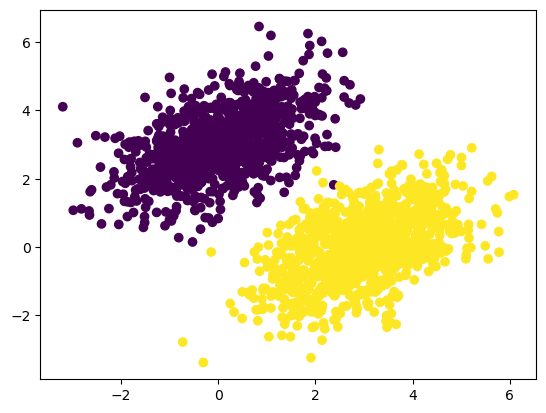

Loss at step 0: 2.9517
Loss at step 1: 0.4130
Loss at step 2: 0.1655
Loss at step 3: 0.1244
Loss at step 4: 0.1117
Loss at step 5: 0.1035
Loss at step 6: 0.0965
Loss at step 7: 0.0902
Loss at step 8: 0.0844
Loss at step 9: 0.0792
Loss at step 10: 0.0744
Loss at step 11: 0.0700
Loss at step 12: 0.0660
Loss at step 13: 0.0624
Loss at step 14: 0.0591
Loss at step 15: 0.0561
Loss at step 16: 0.0534
Loss at step 17: 0.0509
Loss at step 18: 0.0486
Loss at step 19: 0.0465
Loss at step 20: 0.0446
Loss at step 21: 0.0429
Loss at step 22: 0.0414
Loss at step 23: 0.0399
Loss at step 24: 0.0386
Loss at step 25: 0.0375
Loss at step 26: 0.0364
Loss at step 27: 0.0354
Loss at step 28: 0.0345
Loss at step 29: 0.0337
Loss at step 30: 0.0329
Loss at step 31: 0.0323
Loss at step 32: 0.0316
Loss at step 33: 0.0311
Loss at step 34: 0.0306
Loss at step 35: 0.0301
Loss at step 36: 0.0297
Loss at step 37: 0.0293
Loss at step 38: 0.0289
Loss at step 39: 0.0286


In [50]:
# cov=[[1, 0.5],[0.5, 1]] corresponds to an oval-like point cloud oriented from bottom left to top right
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

# Stacking the two classes into an array with shape (2000, 2)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))


import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()


input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))


# The forward pass function
def model(inputs):
    return tf.matmul(inputs, W) + b


# The mean squared error loss function
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)            # We need to average these per-sample loss scores into a single scalar loss value:
                                                        # this is what reduce_mean does. NOTE: see examples after hovering.


# The training step function
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss


# The batch training loop
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")


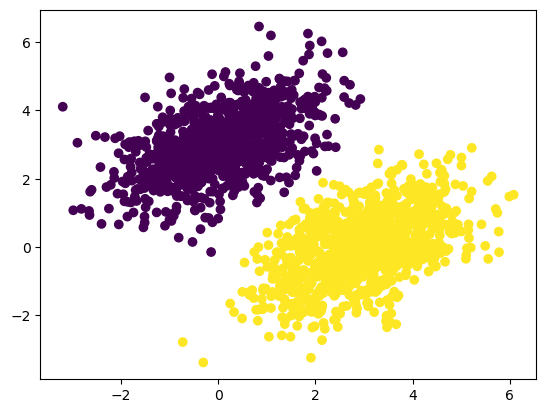

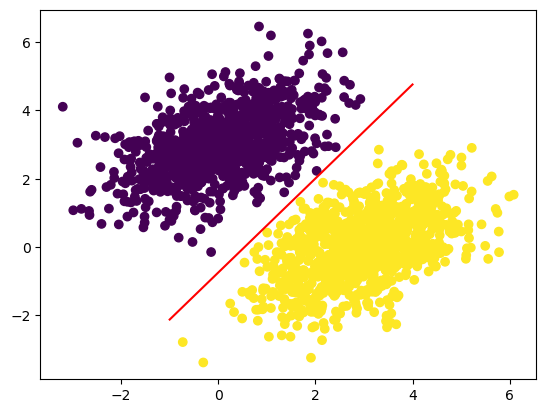

In [51]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()


# Generate 100 regularly spaced numbers between –1 and 4, which we will use to plot our line
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs  
A Layer
is an object that encapsulates some state (weights) and some computation
(a forward pass). The weights are typically defined in a `build()`
, and the computation is defined in 
the `call()` method.  
  
`layer compatibility`.  
  
Note that automatic shape inference is not the only thing that the Layer
class’s `__call__()`
method handles. It takes care of many more things, in particular routing between eager and graph execution.

In [53]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [56]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = keras.Sequential([keras.layers.Dense(1)])

# it’s also possible to specify these arguments as object instances
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]

history = model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 2s 12ms/step - loss: 0.4427 - binary_accuracy: 0.8040 - val_loss: 0.0798 - val_binary_accuracy: 0.9967
Epoch 2/5
88/88 [==============================] - 1s 9ms/step - loss: 0.0757 - binary_accuracy: 0.9650 - val_loss: 0.0355 - val_binary_accuracy: 0.9983
Epoch 3/5
88/88 [==============================] - 1s 8ms/step - loss: 0.0690 - binary_accuracy: 0.9540 - val_loss: 0.1426 - val_binary_accuracy: 0.7433
Epoch 4/5
88/88 [==============================] - 2s 18ms/step - loss: 0.0653 - binary_accuracy: 0.9669 - val_loss: 0.0706 - val_binary_accuracy: 0.9717
Epoch 5/5
88/88 [==============================] - 1s 7ms/step - loss: 0.0691 - binary_accuracy: 0.9597 - val_loss: 0.0259 - val_binary_accuracy: 1.0000


In [58]:
print(history.history)

predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])


{'loss': [0.161554753780365, 0.07296282798051834, 0.0757075697183609, 0.07165593653917313, 0.06730679422616959], 'binary_accuracy': [0.9114285707473755, 0.9649999737739563, 0.947857141494751, 0.9664285778999329, 0.9571428298950195], 'val_loss': [0.07976774871349335, 0.035469409078359604, 0.1426224559545517, 0.07062578946352005, 0.025898141786456108], 'val_binary_accuracy': [0.996666669845581, 0.9983333349227905, 0.7433333396911621, 0.971666693687439, 1.0]}
[[ 1.1253688 ]
 [ 0.23964044]
 [-0.05489194]
 [ 0.98696655]
 [ 0.19221082]
 [-0.07345855]
 [ 0.8995344 ]
 [ 0.06875375]
 [ 0.89884496]
 [ 0.02293354]]


# Getting started with neural networks: Classification and regression  
You can’t directly feed lists of integers into a neural network. They all have different
lengths, but a neural network expects to process contiguous batches of data.  
  
`sparse_categorical_crossentropy:` no need of one hot encoding